In [99]:
# Step 1: Data Acquisition

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
cloud_df = pd.read_csv('cloud_bello_customers.csv')
cloud_df.head()

,CustomerID,ProductType,Rating,Total_Ratings,PaymentMode
0,10471,coates,1 start,8736,Creditcard
1,10472,dresses,2 star,8547,Ewallet
2,10473,NaN,2 star,9833,Prepaid Card
3,10474,dresses,2star,7591,Directdeposit
4,10475,pantas,1 start,5131,NaN


In [102]:
local_df = pd.read_excel('local_bello_sales.xlsx')
local_df.head()

,CustomerID,Price
0,10471,₹ 675036.2138626401
1,10472,"€ 2,315.53"
2,10473,₹ 611426.29122378
3,10474,₹ 210869.48083470002
4,10475,₹ 679422.2811434


In [103]:
!pip install SQLAlchemy

In [104]:
from sqlalchemy import create_engine
engine=create_engine('sqlite:///db_bello_customers.db')

In [105]:
connect = engine.connect()
type(connect)

sqlalchemy.engine.base.Connection

In [106]:
from sqlalchemy import inspect
inspector = inspect(engine)
print(f"table name is {inspector.get_table_names()}")

table name is ['Payments']


In [107]:
on_premise_database = pd.read_sql_table('Payments',connect)
on_premise_database.head()

,Date,CustomerID,PaymentMode,ShippingMode,Gender,ShippingTime
0,16/08/20,10471,Creditcard,Economy,Female,17.0
1,2/8/2020 0:00,10472,Ewallet,Mail,Unspecified,12.0
2,8/8/2020 0:00,10473,Prepaid Card,Mail,None,10.0
3,None,10474,Directdeposit,Normal,Female,2133.0
4,24/08/20,10475,None,Economy,Male,2133.0


In [108]:
## Merging

In [109]:
on_premise_database.columns

Index(['Date', 'CustomerID', 'PaymentMode', 'ShippingMode', 'Gender',
       'ShippingTime'],
      dtype='object')

In [110]:
local_df.columns

Index(['CustomerID', 'Price'], dtype='object')

In [111]:
cloud_df.columns

Index(['CustomerID', 'ProductType', 'Rating', 'Total_Ratings', 'PaymentMode'], dtype='object')

In [112]:
on_premise_database.drop(columns=['CustomerID', 'PaymentMode'], inplace=True)
local_df.drop(columns=['CustomerID'], inplace=True)

In [113]:
raw_data = pd.concat([on_premise_database,local_df,cloud_df], axis=1)
raw_data.head()

,Date,ShippingMode,Gender,ShippingTime,Price,CustomerID,ProductType,Rating,Total_Ratings,PaymentMode
0,16/08/20,Economy,Female,17.0,₹ 675036.2138626401,10471,coates,1 start,8736,Creditcard
1,2/8/2020 0:00,Mail,Unspecified,12.0,"€ 2,315.53",10472,dresses,2 star,8547,Ewallet
2,8/8/2020 0:00,Mail,None,10.0,₹ 611426.29122378,10473,NaN,2 star,9833,Prepaid Card
3,None,Normal,Female,2133.0,₹ 210869.48083470002,10474,dresses,2star,7591,Directdeposit
4,24/08/20,Economy,Male,2133.0,₹ 679422.2811434,10475,pantas,1 start,5131,NaN


In [114]:
raw_data = raw_data[['Date','CustomerID','ProductType','Rating','Total_Ratings','Gender',
                                'PaymentMode','ShippingMode','ShippingTime','Price']]
raw_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price
0,16/08/20,10471,coates,1 start,8736,Female,Creditcard,Economy,17.0,₹ 675036.2138626401
1,2/8/2020 0:00,10472,dresses,2 star,8547,Unspecified,Ewallet,Mail,12.0,"€ 2,315.53"
2,8/8/2020 0:00,10473,NaN,2 star,9833,None,Prepaid Card,Mail,10.0,₹ 611426.29122378
3,None,10474,dresses,2star,7591,Female,Directdeposit,Normal,2133.0,₹ 210869.48083470002
4,24/08/20,10475,pantas,1 start,5131,Male,NaN,Economy,2133.0,₹ 679422.2811434


In [115]:
raw_data.to_csv('uncleaned_data.csv',index=False)

In [116]:
# Duplicate Entries

In [117]:
raw_data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [118]:
raw_data[raw_data.duplicated()]

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price
88,31/08/20,10558,coates,5 star,7007,Unspecified,Credit Card,Normal,11.0,₹ 234895.78095268
89,31/08/20,10558,coates,5 star,7007,Unspecified,Credit Card,Normal,11.0,₹ 234895.78095268


In [119]:
raw_data[raw_data['CustomerID'] == 10558]

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price
87,31/08/20,10558,coates,5 star,7007,Unspecified,Credit Card,Normal,11.0,₹ 234895.78095268
88,31/08/20,10558,coates,5 star,7007,Unspecified,Credit Card,Normal,11.0,₹ 234895.78095268
89,31/08/20,10558,coates,5 star,7007,Unspecified,Credit Card,Normal,11.0,₹ 234895.78095268


In [120]:
# drop duplicates
raw_data.drop_duplicates(inplace=True)

In [121]:
raw_data.duplicated().sum()

0

In [122]:
# Outlier Analysis

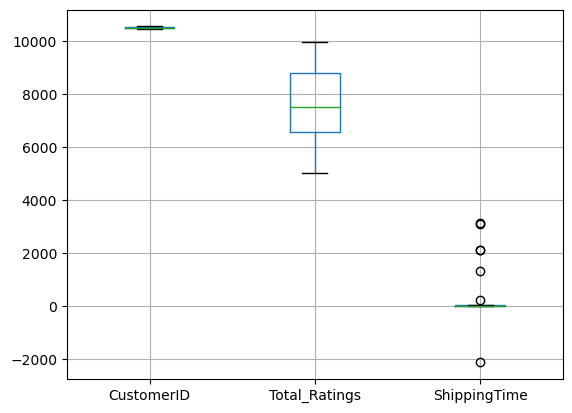

In [123]:
raw_data.boxplot()
plt.show()

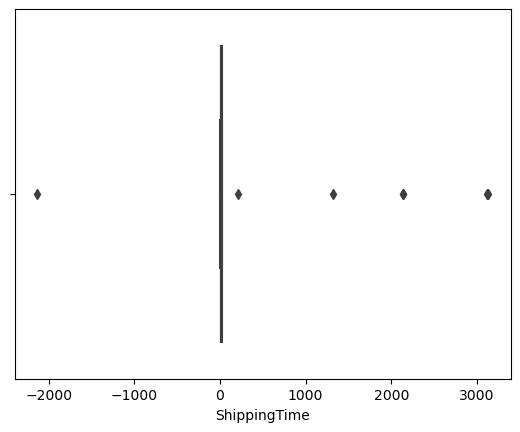

In [124]:
sns.boxplot(raw_data,x='ShippingTime')
plt.show()

In [125]:
q1 = raw_data['ShippingTime'].quantile(0.25)
q2 = raw_data['ShippingTime'].median()
q3 = raw_data['ShippingTime'].quantile(0.75)
iqr = q3 - q1
iqr

9.0

In [126]:
q1,q2,q3

(9.0, 13.0, 18.0)

In [127]:
minimum = (q1 - (1.5*iqr))
maximum = (q3 + (1.5*iqr))

In [128]:
cond1 = raw_data['ShippingTime'] < minimum
cond2 = raw_data['ShippingTime'] > maximum
outliers = raw_data[cond1 | cond2]
outliers

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price
3,None,10474,dresses,2star,7591,Female,Directdeposit,Normal,2133.0,₹ 210869.48083470002
4,24/08/20,10475,pantas,1 start,5131,Male,NaN,Economy,2133.0,₹ 679422.2811434
27,19/08/20,10498,Coats/Jackets,3 star,9297,Unspecified,Direct Deposit,Express,213.0,₹ 635118.07344224
43,14/08/20,10514,dresses,5 star,5567,Unspecified,Credit Card,Express,1321.0,"€ 7,261.79"
59,17/08/20,10530,Cardigan,4 star,6930,Female,Cash,Economy,3113.0,"$8,670.69"
71,20/08/20,10542,Hats,2star,9157,Male,Cash,Mail,3132.0,₹ 708227.40839738
98,26/08/20,10569,Pants,5 star,5200,Male,Directdeposit,Economy,-2131.0,£ 4118.0053827500005


In [129]:
raw_data.drop(index=outliers.index, inplace=True) # drop the outliers

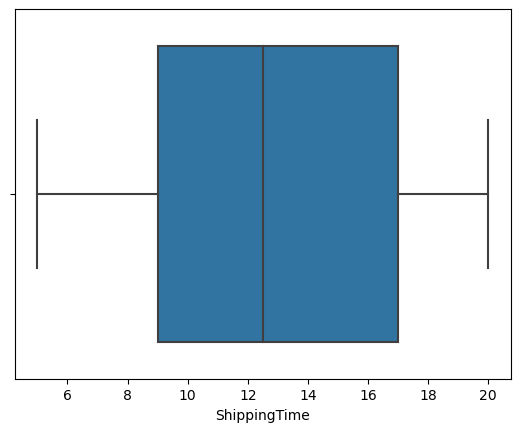

In [130]:
sns.boxplot(raw_data,x='ShippingTime')
plt.show()

In [131]:
# Missing Values

In [132]:
!pip install missingno

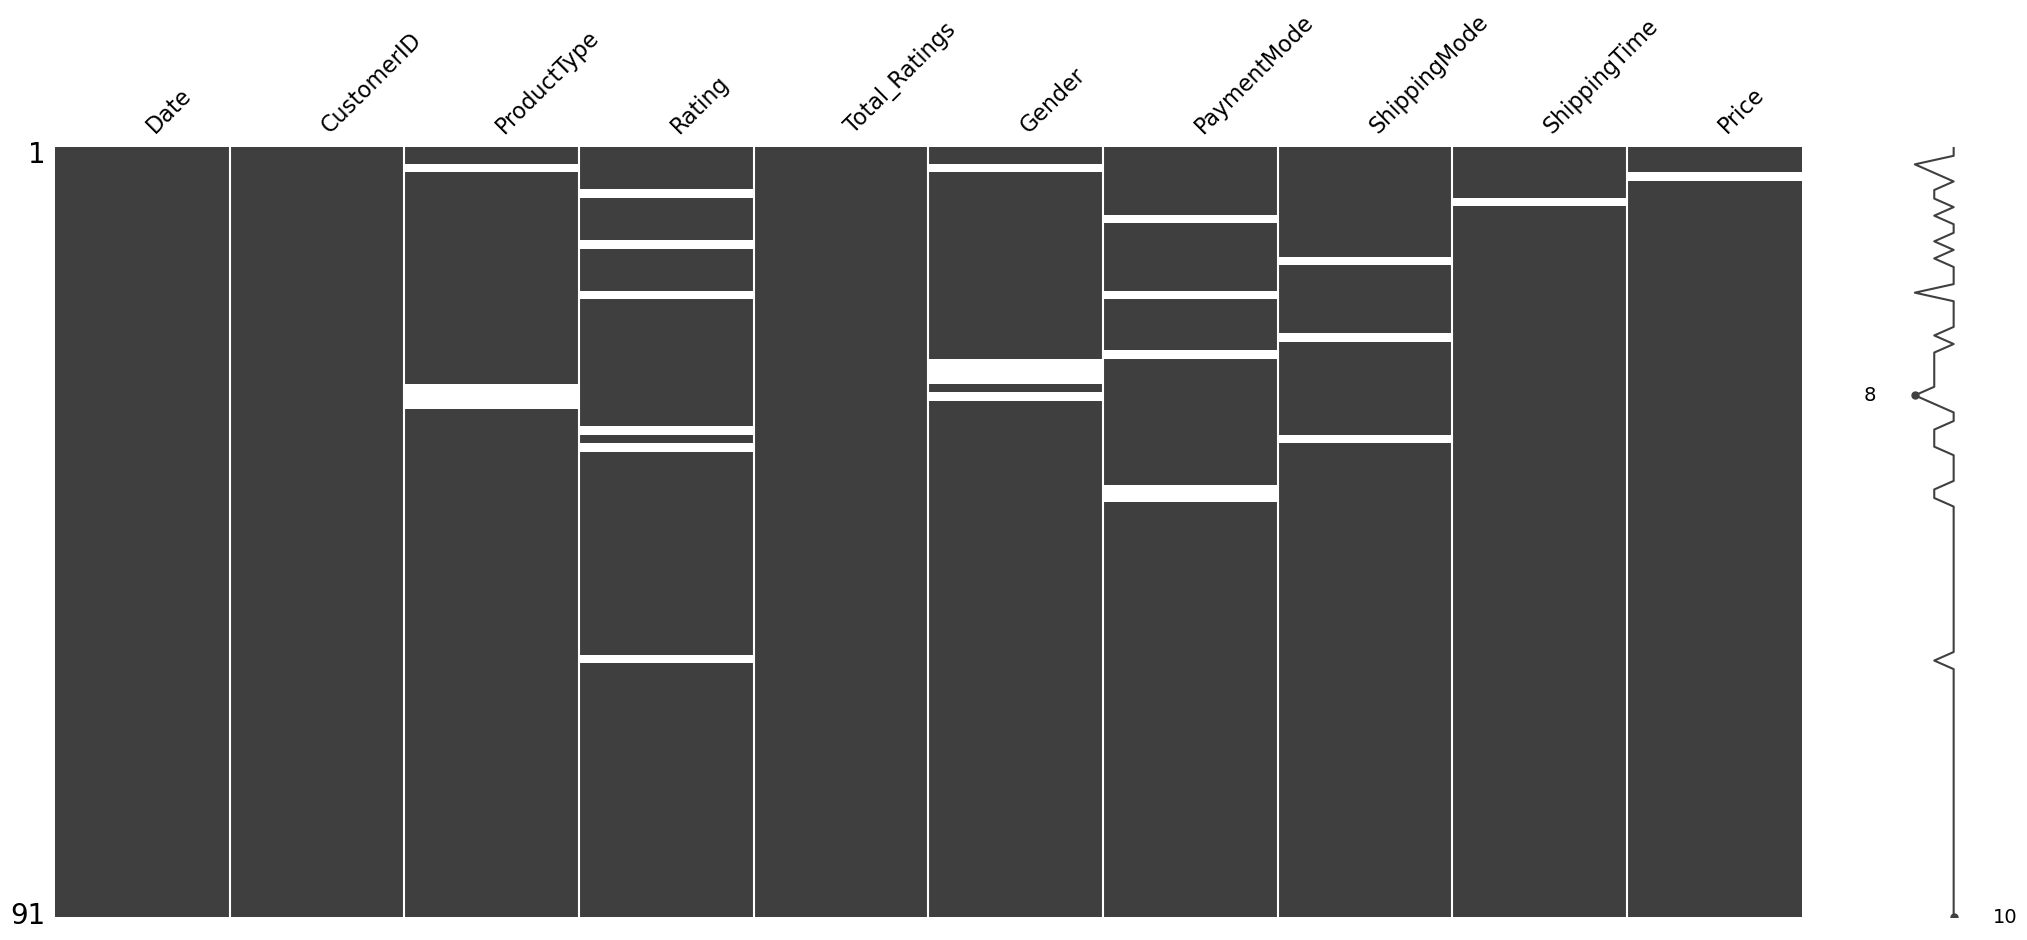

In [133]:
import missingno as mn
mn.matrix(raw_data)
plt.show()

In [134]:
raw_data.isnull().sum()

Date             0
CustomerID       0
ProductType      4
Rating           6
Total_Ratings    0
Gender           5
PaymentMode      5
ShippingMode     3
ShippingTime     1
Price            1
dtype: int64

In [135]:
# imputation
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           91 non-null     object 
 1   CustomerID     91 non-null     int64  
 2   ProductType    87 non-null     object 
 3   Rating         85 non-null     object 
 4   Total_Ratings  91 non-null     int64  
 5   Gender         86 non-null     object 
 6   PaymentMode    86 non-null     object 
 7   ShippingMode   88 non-null     object 
 8   ShippingTime   90 non-null     float64
 9   Price          90 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.8+ KB


In [136]:
# String/Categorical --> mode
# Numerical data --> median, mean

In [137]:
raw_data['Gender'].unique()

array(['Female', 'Unspecified', None, 'Male'], dtype=object)

In [138]:
raw_data['ProductType'] = raw_data['ProductType'].fillna(raw_data['ProductType'].mode()[0])
raw_data['Rating'] = raw_data['Rating'].fillna(raw_data['Rating'].mode()[0])
raw_data['Gender'] = raw_data['Gender'].fillna('Unspecified')
raw_data['PaymentMode'] = raw_data['PaymentMode'].fillna(raw_data['PaymentMode'].mode()[0])
raw_data['ShippingMode'] = raw_data['ShippingMode'].fillna(raw_data['ShippingMode'].mode()[0])
raw_data['ShippingTime'] = raw_data['ShippingTime'].fillna(raw_data['ShippingTime'].median())

In [139]:
raw_data.isnull().sum()

Date             0
CustomerID       0
ProductType      0
Rating           0
Total_Ratings    0
Gender           0
PaymentMode      0
ShippingMode     0
ShippingTime     0
Price            1
dtype: int64

In [140]:
raw_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price
0,16/08/20,10471,coates,1 start,8736,Female,Creditcard,Economy,17.0,₹ 675036.2138626401
1,2/8/2020 0:00,10472,dresses,2 star,8547,Unspecified,Ewallet,Mail,12.0,"€ 2,315.53"
2,8/8/2020 0:00,10473,coates,2 star,9833,Unspecified,Prepaid Card,Mail,10.0,₹ 611426.29122378
5,28/08/20,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Mail,20.0,NaN
6,8/8/2020 0:00,10477,coates,5 star,9406,Unspecified,Direct Deposit,Mail,14.0,£ 6610.077565000001


In [141]:
# Fixing the Errors in the DataSet

In [142]:
raw_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price
0,16/08/20,10471,coates,1 start,8736,Female,Creditcard,Economy,17.0,₹ 675036.2138626401
1,2/8/2020 0:00,10472,dresses,2 star,8547,Unspecified,Ewallet,Mail,12.0,"€ 2,315.53"
2,8/8/2020 0:00,10473,coates,2 star,9833,Unspecified,Prepaid Card,Mail,10.0,₹ 611426.29122378
5,28/08/20,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Mail,20.0,NaN
6,8/8/2020 0:00,10477,coates,5 star,9406,Unspecified,Direct Deposit,Mail,14.0,£ 6610.077565000001


In [143]:
raw_data['ProductType'].unique()

array(['coates', 'dresses ', 'Coats/Jackets', 'Jeans', 'pantas', 'Pants',
       'Cardigan', 'Dresses', 'Shirts/Tops', 'Hats'], dtype=object)

In [144]:
def product_type(x):
    if x=='coates':
        return "Coats/Jackets"
    elif x == 'dresses ':
        return 'Dresses'
    elif x == 'pantas':
        return 'Pants'
    else :
        return x

In [145]:
raw_data['ProductType'] = raw_data['ProductType'].apply(product_type)

In [146]:
raw_data['ProductType'].unique()

array(['Coats/Jackets', 'Dresses', 'Jeans', 'Pants', 'Cardigan',
       'Shirts/Tops', 'Hats'], dtype=object)

In [147]:
raw_data['Rating'].unique()

array(['1 start', '2 star', '5 star', '4 star', '2star', '3 star'],
      dtype=object)

In [148]:
def rating(x):
    if x=='1 start':
        return '1 star'
    elif x == '2star':
        return '2 star'
    else :
        return x
raw_data['Rating'] = raw_data['Rating'].apply(rating)
raw_data['Rating'].unique()

array(['1 star', '2 star', '5 star', '4 star', '3 star'], dtype=object)

In [149]:
raw_data['PaymentMode'].unique()

array(['Creditcard', 'Ewallet', 'Prepaid Card', 'Direct Deposit',
       'Mobile Payment', 'Cash', 'Mobile', 'Credit Card', 'Directdeposit'],
      dtype=object)

In [150]:
def payment_type(x):
    if x=='Creditcard':
        return 'Credit Card'
    elif x == 'Mobile':
        return 'Mobile Payment'
    elif x == 'Directdeposit':
        return 'Direct Deposit'
    else:
        return x
raw_data['PaymentMode'] = raw_data['PaymentMode'].apply(payment_type)
raw_data['PaymentMode'].unique()

array(['Credit Card', 'Ewallet', 'Prepaid Card', 'Direct Deposit',
       'Mobile Payment', 'Cash'], dtype=object)

In [151]:
raw_data['ShippingMode'].unique()

array(['Economy', 'Mail', 'Express', 'Normal'], dtype=object)

In [152]:
## Transformation of Data

In [153]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           91 non-null     object 
 1   CustomerID     91 non-null     int64  
 2   ProductType    91 non-null     object 
 3   Rating         91 non-null     object 
 4   Total_Ratings  91 non-null     int64  
 5   Gender         91 non-null     object 
 6   PaymentMode    91 non-null     object 
 7   ShippingMode   91 non-null     object 
 8   ShippingTime   91 non-null     float64
 9   Price          90 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.8+ KB


In [158]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'], format='%d/%m/%Y', dayfirst=True)

In [159]:
raw_data['Date'].head()

0   2020-08-16
1   2020-08-02
2   2020-08-08
5   2020-08-28
6   2020-08-08
Name: Date, dtype: datetime64[ns]

In [160]:
raw_data['Price'].head()

0    ₹ 675036.2138626401
1             € 2,315.53
2      ₹ 611426.29122378
5                    NaN
6    £ 6610.077565000001
Name: Price, dtype: object

In [161]:
#INR
raw_data['Price'].head(10)

0      ₹ 675036.2138626401
1               € 2,315.53
2        ₹ 611426.29122378
5                      NaN
6      £ 6610.077565000001
7               $4,287.06 
8            £ 3010.212198
9     £ 4032878.5368307503
10              € 3,702.54
11              € 6,580.20
Name: Price, dtype: object

In [162]:
def currency(x):
    if pd.isna(x):
        return ''
    elif '$' in x:
        return 'Americal Dollar'
    elif '€' in x:
        return 'Euro'
    elif '£' in x:
        return 'British Pound'
    elif '₹' in x:
        return 'Indian Rupee'
    else:
        return ''

In [163]:
raw_data['currency_description'] = raw_data['Price'].apply(currency)
raw_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price,currency_description
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17.0,₹ 675036.2138626401,Indian Rupee
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12.0,"€ 2,315.53",Euro
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10.0,₹ 611426.29122378,Indian Rupee
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Mail,20.0,NaN,
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14.0,£ 6610.077565000001,British Pound


In [164]:
raw_data['currency_description'].unique()

array(['Indian Rupee', 'Euro', '', 'British Pound', 'Americal Dollar'],
      dtype=object)

In [165]:
c = {'Euro': 92.02, 
    'British Pound':109.75 ,
    'Americal Dollar':83.98 }

In [166]:
raw_data['Price']= raw_data['Price'].str.replace('$',"")
raw_data['Price']= raw_data['Price'].str.replace('£',"")
raw_data['Price']= raw_data['Price'].str.replace('€',"")
raw_data['Price']= raw_data['Price'].str.replace('₹',"")
raw_data['Price']= raw_data['Price'].str.replace(',',"")

In [167]:
raw_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price,currency_description
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17.0,675036.2138626401,Indian Rupee
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12.0,2315.53,Euro
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10.0,611426.29122378,Indian Rupee
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Mail,20.0,NaN,
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14.0,6610.077565000001,British Pound


In [168]:
raw_data['Price'].fillna('0', inplace=True)

In [169]:
raw_data['Price'] = raw_data['Price'].astype('float')

In [170]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  91 non-null     datetime64[ns]
 1   CustomerID            91 non-null     int64         
 2   ProductType           91 non-null     object        
 3   Rating                91 non-null     object        
 4   Total_Ratings         91 non-null     int64         
 5   Gender                91 non-null     object        
 6   PaymentMode           91 non-null     object        
 7   ShippingMode          91 non-null     object        
 8   ShippingTime          91 non-null     float64       
 9   Price                 91 non-null     float64       
 10  currency_description  91 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 8.5+ KB


In [171]:
price_inr = []
for i in range(len(raw_data)):
    if raw_data['currency_description'].iloc[i] in c.keys():
        price_inr.append(raw_data['Price'].iloc[i]*c[raw_data['currency_description'].iloc[i]])
    else:
        price_inr.append(raw_data['Price'].iloc[i])

In [172]:
price_inr

[675036.2138626401,
 213075.0706,
 611426.29122378,
 0.0,
 725456.0127587501,
 360027.29880000005,
 330370.78873050003,
 442608419.4171748,
 340707.73079999996,
 605510.004,
 567447.8212,
 264423.62700000004,
 818226.3778000001,
 240425.0824765625,
 2828677987.442325,
 167219.29640000002,
 160979.788,
 522469.8128,
 139328.40219999998,
 423071.0765411876,
 634808.1963701401,
 596893.42988816,
 352892.2276498125,
 500923.63939631253,
 534945.3872,
 176647.10500702,
 1789808728.4974,
 581033.69733056,
 482389.0844,
 110529.79150523999,
 510400.89259999996,
 86049.26720000002,
 362267.8852,
 794242.654365125,
 102369.19747878,
 217652.6456,
 217387.35303316,
 514514.66367266,
 650274.3332843126,
 582054.4626,
 158314.68567481253,
 167727.12548098,
 262419.02440000005,
 255254.278,
 159529.19686752,
 85038.9878,
 325505.3302182,
 152315.3658,
 676891.7428365399,
 442385.73497213994,
 166057.181308,
 321706.90933682,
 636005.037307875,
 377596.03938408,
 661717.7799501251,
 515041.4612,
 43

In [173]:
raw_data['price_inr'] = price_inr
raw_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price,currency_description,price_inr
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,Economy,17.0,675036.213863,Indian Rupee,675036.213863
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,Mail,12.0,2315.530000,Euro,213075.070600
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,Mail,10.0,611426.291224,Indian Rupee,611426.291224
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,Mail,20.0,0.000000,,0.000000
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,Mail,14.0,6610.077565,British Pound,725456.012759


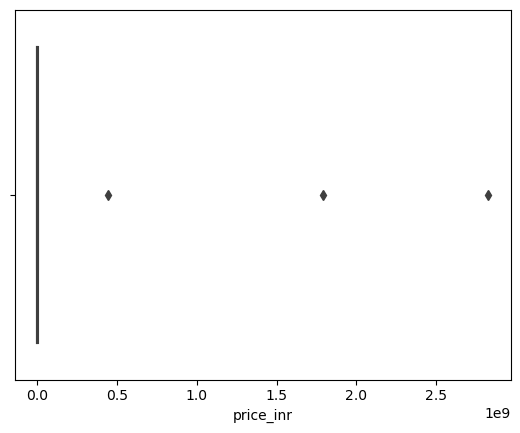

In [174]:
sns.boxplot(data=raw_data,x='price_inr')
plt.show()

In [175]:
q1 = raw_data['price_inr'].quantile(0.25)
q2 = raw_data['price_inr'].quantile(0.50)
q3 = raw_data['price_inr'].quantile(0.75)
iqr = q3-q1
iqr

374927.50366774

In [176]:
minimum = (q1 - (1.5*iqr))
maximum = (q3 + (1.5*iqr))
cond1 = (raw_data['price_inr'] < minimum)
cond2 = (raw_data['price_inr'] > maximum)
outliers = raw_data[cond1|cond2]
outliers

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingMode,ShippingTime,Price,currency_description,price_inr
9,2020-08-16,10480,Pants,1 star,6914,Female,Prepaid Card,Express,19.0,4.032879e+06,British Pound,4.426084e+08
16,2020-08-17,10487,Pants,2 star,5783,Female,Credit Card,Economy,19.0,2.577383e+07,British Pound,2.828678e+09
29,2020-08-02,10500,Jeans,1 star,9410,Unspecified,Direct Deposit,Mail,5.0,2.131232e+07,Americal Dollar,1.789809e+09


In [177]:
raw_data.drop(index=outliers.index, inplace=True)

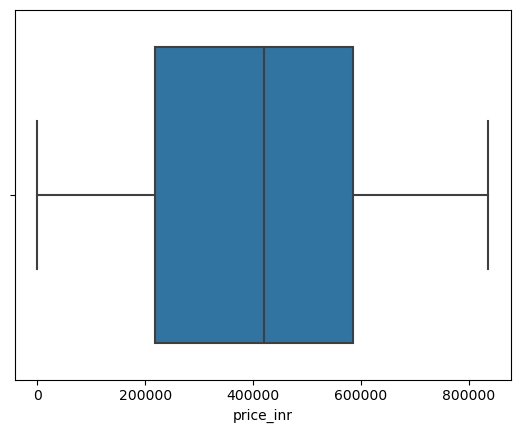

In [178]:
sns.boxplot(data=raw_data,x='price_inr')
plt.show()

In [179]:
# Encoding

In [180]:
# Dataset Categorical (string)
# Ordinal - Example: Rating of restaurant
# Nominal - Example: Gender

In [181]:
# Ordinal --> LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [182]:
raw_data['Rating'].unique()

array(['1 star', '2 star', '5 star', '4 star', '3 star'], dtype=object)

In [183]:
le = LabelEncoder()
le.fit(raw_data['Rating'])

LabelEncoder()

In [184]:
le.classes_

array(['1 star', '2 star', '3 star', '4 star', '5 star'], dtype=object)

In [185]:
raw_data['rating_encoded'] = le.transform(raw_data['Rating'])
raw_data[['Rating','rating_encoded']]

,Rating,rating_encoded
0,1 star,0
1,2 star,1
2,2 star,1
5,2 star,1
6,5 star,4
...,...,...
94,1 star,0
95,2 star,1
96,5 star,4
97,3 star,2


In [186]:
#One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

In [187]:
ohe = OneHotEncoder()

In [188]:
raw_data['ShippingMode'].unique()

array(['Economy', 'Mail', 'Express', 'Normal'], dtype=object)

In [189]:
ohe.fit(raw_data["ShippingMode"].values.reshape(-1,1))

OneHotEncoder()

In [190]:
ohe.categories_

[array(['Economy', 'Express', 'Mail', 'Normal'], dtype=object)]

In [191]:
r = ohe.transform(raw_data['ShippingMode'].values.reshape(-1,1))
df1 = pd.DataFrame(r.todense(), columns=ohe.categories_)
df1

,Economy,Express,Mail,Normal
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
83,0.0,0.0,1.0,0.0
84,0.0,1.0,0.0,0.0
85,0.0,0.0,0.0,1.0
86,0.0,0.0,0.0,1.0


In [192]:
raw_data['ShippingMode'].head()

0    Economy
1       Mail
2       Mail
5       Mail
6       Mail
Name: ShippingMode, dtype: object

In [193]:
raw_data = pd.get_dummies(raw_data, columns=['ShippingMode'])

In [194]:
# Scaling of Numerical Values

In [195]:
# Strandard Scaler --> transform the value into Z score
# It will result in a column that has Zero mean and Std dev = 1
# Normalizer
# Min Max Scaler

In [196]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [197]:
raw_data.columns

Index(['Date', 'CustomerID', 'ProductType', 'Rating', 'Total_Ratings',
       'Gender', 'PaymentMode', 'ShippingTime', 'Price',
       'currency_description', 'price_inr', 'rating_encoded',
       'ShippingMode_Economy', 'ShippingMode_Express', 'ShippingMode_Mail',
       'ShippingMode_Normal'],
      dtype='object')

In [198]:
ss.fit(raw_data['price_inr'].values.reshape(-1,1))

StandardScaler()

In [199]:
ss.mean_ # mean

array([409661.24524315])

In [200]:
ss.var_ # variance

array([4.30714871e+10])

In [201]:
raw_data['price_scaled'] = ss.transform(raw_data['price_inr'].values.reshape(-1,1))
raw_data.head()

,Date,CustomerID,ProductType,Rating,Total_Ratings,Gender,PaymentMode,ShippingTime,Price,currency_description,price_inr,rating_encoded,ShippingMode_Economy,ShippingMode_Express,ShippingMode_Mail,ShippingMode_Normal,price_scaled
0,2020-08-16,10471,Coats/Jackets,1 star,8736,Female,Credit Card,17.0,675036.213863,Indian Rupee,675036.213863,0,True,False,False,False,1.278689
1,2020-08-02,10472,Dresses,2 star,8547,Unspecified,Ewallet,12.0,2315.530000,Euro,213075.070600,1,False,False,True,False,-0.947236
2,2020-08-08,10473,Coats/Jackets,2 star,9833,Unspecified,Prepaid Card,10.0,611426.291224,Indian Rupee,611426.291224,1,False,False,True,False,0.972190
5,2020-08-28,10476,Coats/Jackets,2 star,5347,Female,Direct Deposit,20.0,0.000000,,0.000000,1,False,False,True,False,-1.973922
6,2020-08-08,10477,Coats/Jackets,5 star,9406,Unspecified,Direct Deposit,14.0,6610.077565,British Pound,725456.012759,4,False,False,True,False,1.521633


In [202]:
raw_data[['price_scaled','price_inr']].describe()

,price_scaled,price_inr
count,8.800000e+01,88.000000
mean,-6.055762e-17,409661.245243
std,1.005731e+00,208726.044513
min,-1.973922e+00,0.000000
25%,-9.254985e-01,217586.322458
50%,4.994365e-02,420026.385771
75%,8.449975e-01,585029.244150
max,2.057392e+00,836645.711200


In [203]:
# Zscore = StandardScaler

In [204]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler(feature_range=(1, 2),clip=True)
minmax_scale.fit(raw_data['price_inr'].values.reshape(-1,1),)
raw_data['price_minmax_scaled'] = minmax_scale.transform(raw_data['price_inr'].values.reshape(-1,1))
raw_data[['price_scaled','price_inr', 'price_minmax_scaled']].describe()

,price_scaled,price_inr,price_minmax_scaled
count,8.800000e+01,88.000000,88.000000
mean,-6.055762e-17,409661.245243,1.489647
std,1.005731e+00,208726.044513,0.249480
min,-1.973922e+00,0.000000,1.000000
25%,-9.254985e-01,217586.322458,1.260070
50%,4.994365e-02,420026.385771,1.502036
75%,8.449975e-01,585029.244150,1.699256
max,2.057392e+00,836645.711200,2.000000


In [205]:
raw_data.to_csv('final_data.csv',index=False)